In [4]:
pip install opencv-python

Note: you may need to restart the kernel to use updated packages.


In [5]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_lfw_people
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neural_network import MLPClassifier
import numpy as np
import os,cv2

def plot_gallery(images, titles, h, w, n_row=3, n_col=4):
    plt.figure(figsize=(1.8 *n_col, 2.4 * n_row))
    plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)
    for i in range(n_row*n_col):
        plt.subplot(n_row, n_col, i+1)
        plt.imshow(images[i].reshape((h, w)), cmap=plt.cm.gray)
        plt.title(titles[i], size=12)
        plt.xticks(())
        plt.yticks(())

In [7]:
dir_name = "dataset/faces/"
y=[]
X=[]
target_names=[]
person_id=0
h=w=300
n_samples=0
class_names=[]
for person_name in os.listdir(dir_name):
    dir_path=dir_name+person_name+"/"
    class_names.append(person_name)
    for image_name in os.listdir(dir_path):
        image_path=dir_path+image_name
        img=cv2.imread(image_path)
        gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
        resized_image=cv2.resize(gray,(h,w))
        v=resized_image.flatten()
        X.append(v)
        n_samples=n_samples+1
        y.append(person_id)
        target_names.append(person_name)
    person_id=person_id+1
y=np.array(y)
X=np.array(X)
target_names=np.array(target_names)
n_features=X.shape[1]
print(y.shape,X.shape,target_names.shape)
print("Number of samples:",n_samples)
n_classes=target_names.shape[0]
print("Total dataset size:")
print("n_samples: %d" % n_samples)
print("n_features: %d" % n_features)
print("n_classes: %d" % n_classes)

(450,) (450, 90000) (450,)
Number of sampels: 450
Total dataset size:
n_samples: 450
n_features: 90000
n_classes: 450


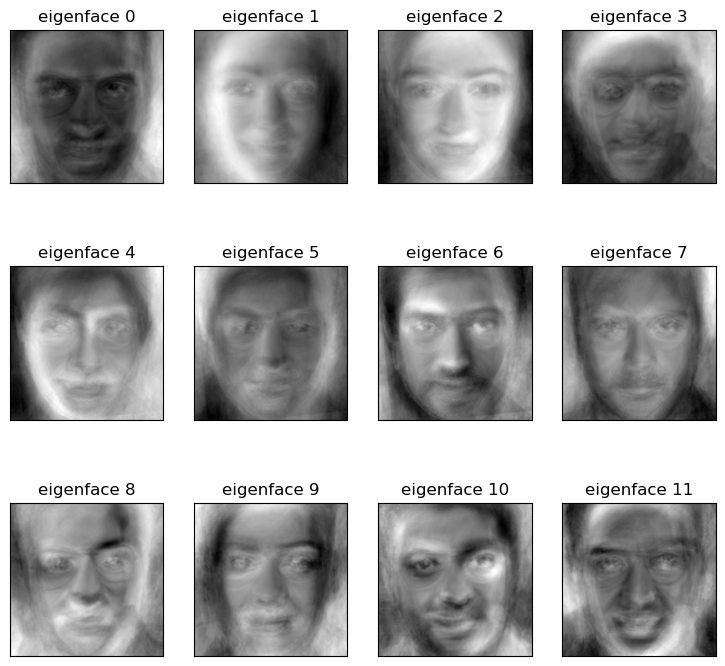

Projecting input data on the eigenfaces orthonormal basis
(360, 150) (90, 150)
project done


In [20]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)
n_components=150
pca = PCA(n_components=n_components, svd_solver='randomized', whiten = True).fit(X_train)
eigenfaces=pca.components_.reshape(n_components,h,w)
eigenface_titles = ["eigenface %d" % i for i in range(eigenfaces.shape[0])]
plot_gallery(eigenfaces, eigenface_titles, h , w)
plt.show()
print("Projecting input data on the eigenfaces orthonormal basis")
X_train_pca = pca.transform(X_train)
X_test_pca=pca.transform(X_test)
print(X_train_pca.shape,X_test_pca.shape)
lda=LinearDiscriminantAnalysis()
lda.fit(X_train_pca, y_train)
X_train_lda=lda.transform(X_train_pca)
X_test_lda=lda.transform(X_test_pca)
print("project done")

In [21]:
clf=MLPClassifier(random_state=1, hidden_layer_sizes=(10,10),max_iter=1000, verbose= True).fit(X_train_lda, y_train)
print("Model Weights:")
model_info=[coef.shape for coef in clf.coefs_]
print(model_info)

Iteration 1, loss = 2.62939053
Iteration 2, loss = 2.58575626
Iteration 3, loss = 2.54583929
Iteration 4, loss = 2.50498242
Iteration 5, loss = 2.46615881
Iteration 6, loss = 2.42769251
Iteration 7, loss = 2.39228049
Iteration 8, loss = 2.35717029
Iteration 9, loss = 2.32326653
Iteration 10, loss = 2.29042755
Iteration 11, loss = 2.25938190
Iteration 12, loss = 2.22847794
Iteration 13, loss = 2.19883190
Iteration 14, loss = 2.17109315
Iteration 15, loss = 2.14274881
Iteration 16, loss = 2.11591192
Iteration 17, loss = 2.08983576
Iteration 18, loss = 2.06491790
Iteration 19, loss = 2.04022494
Iteration 20, loss = 2.01621457
Iteration 21, loss = 1.99229632
Iteration 22, loss = 1.96908237
Iteration 23, loss = 1.94696006
Iteration 24, loss = 1.92464589
Iteration 25, loss = 1.90284902
Iteration 26, loss = 1.88172173
Iteration 27, loss = 1.86099893
Iteration 28, loss = 1.84032709
Iteration 29, loss = 1.82039585
Iteration 30, loss = 1.79975365
Iteration 31, loss = 1.78024310
Iteration 32, los

Accuracy: 75.55555555555556


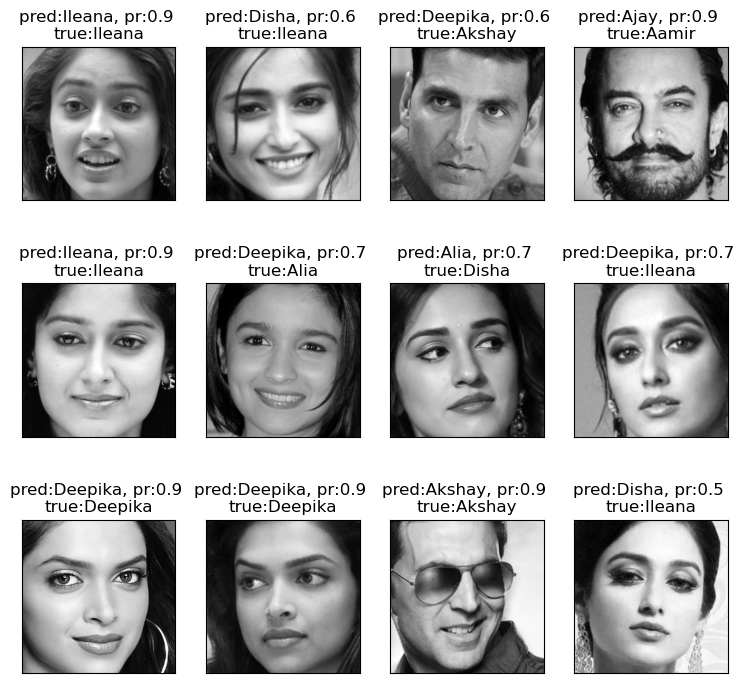

In [22]:
y_pred=[]
y_prob=[]
for test_face in X_test_lda:
    prob=clf.predict_proba([test_face])[0]
    class_id=np.where(prob==np.max(prob))[0][0]
    y_pred.append(class_id)
    y_prob.append(np.max(prob))
y_pred=np.array(y_pred)
prediction_titles=[]
true_positive=0
for i in range(y_pred.shape[0]):
    true_name=class_names[y_test[i]]
    pred_name=class_names[y_pred[i]]
    result='pred:%s, pr:%s \ntrue:%s' %(pred_name, str(y_prob[i])[0:3],true_name)
    prediction_titles.append(result)
    if true_name==pred_name:
        true_positive=true_positive+1
print("Accuracy:", true_positive * 100 /y_pred.shape[0])
plot_gallery(X_test, prediction_titles,h,w)
plt.show()
